# 1. Missing Values

In the machine learning workflow, once we've selected the model we want to use, selecting the appropriate features for that model is the next important step. In this mission, we'll explore `how to use correlation between features and the target column, correlation between features, and variance of features to select features`.

* Read AmesHousing.txt into a dataframe named data. Be sure to seperate on the \t delimiter.
* Create a dataframe called train, which contains the first 1460 rows of data.
* Create a dataframe called test, which contains the rest of the rows of data.
* Select the integer and float columns from train and assign them to the variable numerical_train.
* Drop the following columns from numerical_train:
  * PID (place ID isn't useful for modeling)
  * Year Built
  * Year Remod/Add
  * Garage Yr Blt
  * Mo Sold
  * Yr Sold
* Calculate the number of missing values from each column in numerical_train. Create a Series object where the index is made up of column names and the associated values are the number of missing values:
  * Order                0
  * PID                  0
  * MS SubClass          0
  * MS Zoning            0
...
* Assign this Series object to null_series. Select the subset of null_series to keep only the columns with no missing values, and assign the resulting Series object to full_cols_series.
* Display full_cols_series using the print() function.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
train.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

In [5]:
numerical_train = train.select_dtypes(include=['int64','float64'])

In [6]:
numerical_train.columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [7]:
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


# 2. Correlating Feature Columns With Target Column

In [8]:
len(full_cols_series)

25

The subset of features we want to focus on, full_cols_series, contains 25 columns:
The resulting correlation matrix will contain 25 * 25 or 625 correlation values.

## TODO:
* Compute the pairwise correlation coefficients between all of the columns in train_subset.
* Select just the SalePrice column from the resulting data frame, compute the absolute value of each term, sort the resulting Series by the correlation values, and assign to sorted_corrs.

In [9]:
train_subset = train[full_cols_series.index]

In [10]:
corrmat=train_subset.corr()

In [11]:
corrmat[:3]

,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
Order,1.000000,-0.023140,0.020064,-0.049116,0.078547,-0.060288,0.011011,0.016425,-0.036472,-0.074932,...,-0.058123,-0.051493,-0.064436,0.035471,0.013040,0.006725,0.026088,0.020716,-0.020449,-0.068181
MS SubClass,-0.023140,1.000000,-0.248209,0.054533,-0.099862,-0.273248,0.342229,-0.001077,0.089580,0.168263,...,-0.046967,-0.110141,-0.034953,0.000592,0.009778,-0.051771,-0.065956,-0.022696,-0.023721,-0.088504
Lot Area,0.020064,-0.248209,1.000000,0.100290,-0.010353,0.295995,0.005407,-0.013667,0.239224,0.107753,...,0.166939,0.179216,0.110003,0.044313,0.002098,0.022090,0.054119,0.010442,0.025428,0.274730


In [12]:
sorted_corrs=corrmat['SalePrice'].abs().sort_values()

In [13]:
sorted_corrs.head()

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Name: SalePrice, dtype: float64

# 3. Correlation Matrix Heatmap

We now have a decent list of candidate features to use in our model, sorted by how strongly they're correlated with the SalePrice column. For now, let's keep only the `features that have a correlation of 0.3 or higher`. This cutoff is a bit arbitrary and, in general, it's a good idea to experiment with this cutoff. For example, `you can train and test models using different cutoffs and see where your model stops improving.`

The next thing we need to look for is **`for potential collinearity between some of these feature columns`**. **Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information.** If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

While we can check for collinearity between 2 columns using the correlation matrix, we run the risk of information overload. We can instead generate a [correlation matrix heatmap](http://seaborn.pydata.org/examples/heatmap_annotation.html) using Seaborn to visually compare the correlations and look for problematic pairwise feature correlations.

## TODO:
* Select only the columns in sorted_corrs with a correlation above 0.3 and assign to strong_corrs.
* Filter train_subset using the indexes of strong_corrs and store the correlations to corrmat.
* Use the seaborn.heatmap() function to generate a correlation matrix heatmap for the columns in strong_corrs.

In [14]:
strong_corrs=sorted_corrs[sorted_corrs>0.3]

In [15]:
corrmat=train_subset[strong_corrs.index].corr()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

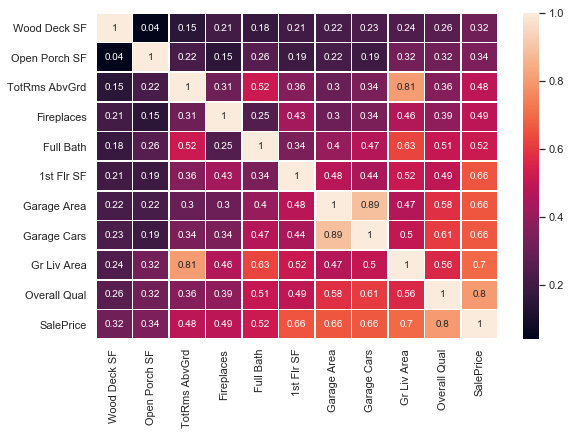

In [17]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, annot=True, linewidths=.5, ax=ax)
plt.show()

# 4. Train And Test Model

Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:

* Gr Liv Area and TotRms AbvGrd
* Garage Area and Garage Cars

If we read the descriptions of these columns from the data documentation, we can tell that each pair of columns reflects very similar information. Because Gr Liv Area and Garage Area are continuous variables that capture more nuance, let's drop the TotRms AbvGrd and Garage Cars.

The last thing we'll need to do is confirm that the test set contains no missing values for these columns:

In [18]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
print(test[final_corr_cols.index].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB
None


## TODO:
* Filter the test data frame so it only contains the columns from final_corr_cols.index. Then, drop the row containing missing values and assign the result to clean_test
* Build a linear regression model using the features in features.
* Calculate the RMSE on the test and train sets.
* Assign the train RMSE to train_rmse and the test RMSE to test_rmse.

In [19]:
clean_test=test[final_corr_cols.index].dropna()

In [20]:
clean_test.isnull().sum()

Wood Deck SF     0
Open Porch SF    0
Fireplaces       0
Full Bath        0
1st Flr SF       0
Garage Area      0
Gr Liv Area      0
Overall Qual     0
SalePrice        0
dtype: int64

In [21]:
features=final_corr_cols.drop(['SalePrice']).index
features

Index(['Wood Deck SF', 'Open Porch SF', 'Fireplaces', 'Full Bath',
       '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [22]:
target='SalePrice'

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185852
41032.0261201977


# 5. Removing Low Variance Features

The last technique we'll explore is **removing features with low variance**. 

When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability. On the extreme end, let's imagine a column with a variance of 0. **This would mean that all of the values in that column were exactly the same**. `This means that the column isn't informative and isn't going to help the model make better predictions.`

To make apples to apples comparisons between columns, we need to rescale all of the columns to vary between 0 and 1. This is known as min-max scaling or as [rescaling](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling). Here's the formula for rescaling:

### $\dfrac{x - \min(x)} {\max(x) - \min(x)}$

Where:

* $x$ is an individual value
* $\min(x)$ is the minimum value for the column  belongs to
* $\max(x)$ is the maximum value for the column  belongs to

## TODO:
* Select the columns in features from the train data frame. Rescale each of the columns so the values range from 0 to 1, by using train[features] instead of  in the formula above. Assign the result to unit_train.
* Calculate and display the column minimum and maximum values of unit_train to ensure that all values range from 0 to 1.

In [25]:
unit_train = (train[features] - train[features].min())/(train[features].max() - train[features].min())
print(unit_train.min())
print(unit_train.max())

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64
Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64


# 6. Final Model

Let's compute the variances and remove the columns with the lowest variance.

In [26]:
unit_train.var()

Wood Deck SF     0.033064
Open Porch SF    0.013938
Fireplaces       0.046589
Full Bath        0.018621
1st Flr SF       0.025814
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
dtype: float64

In [27]:
print(unit_train.var().min())

0.013937595716463504


## TODO:
* Drop Open Porch SF from features.
* Build a linear regression model using the remaining features.
* Calculate the RMSE on the test and train sets.
* Assign the train RMSE to train_rmse_2 and the test RMSE to test_rmse_2.
* Display both RMSE values using the print() function.

In [28]:
features = features.drop('Open Porch SF')

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

34372.696707783965
40591.42702437726


We were able to improve the RMSE value to approximately 40591 by removing the Open Porch SF feature. This is most likely the furthest we can go without transforming and utilizing the other features in the dataset so we'll stop here for now